**Netflex**

#import librar and load dataset

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from textblob import TextBlob
from wordcloud import WordCloud
import re
%matplotlib inline

df=pd.read_csv('netflix_titles_2021.csv')

In [5]:
df.shape

(8807, 12)

#1st 5 rows

In [39]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0
3,s4,TV Show,Jailbirds New Orleans,Unknown,NaN,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [12]:
df.isnull().sum() # missing values

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [32]:
df['director'].fillna("Unknown", inplace=True)

In [33]:
df['country'].fillna("Unknown", inplace=True)

#Convert date


In [36]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year after conversion


In [37]:
df['year_added'] = df['date_added'].dt.year

# Check sample


In [38]:
print(df[['date_added', 'year_added']].head(10))

  date_added  year_added
0 2021-09-25      2021.0
1 2021-09-24      2021.0
2 2021-09-24      2021.0
3 2021-09-24      2021.0
4 2021-09-24      2021.0
5 2021-09-24      2021.0
6 2021-09-24      2021.0
7 2021-09-24      2021.0
8 2021-09-24      2021.0
9 2021-09-24      2021.0


movies vs Tv shows

/tmp/ipython-input-639390245.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="type",palette="Set2")


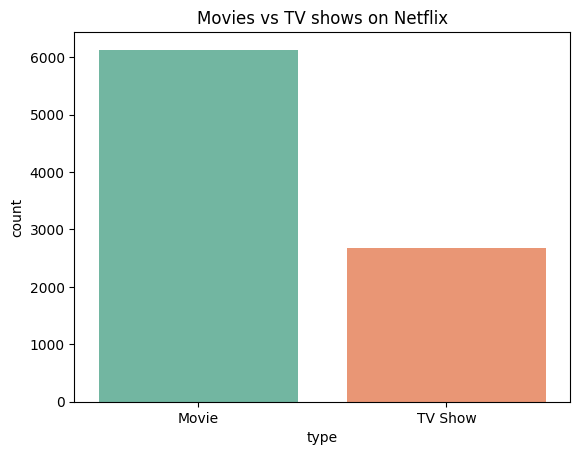

In [43]:
sns.countplot(data=df,x="type",palette="Set2")
plt.title("Movies vs TV shows on Netflix")
plt.show()

content added per year

/tmp/ipython-input-2573193382.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,y="year_added",order=df['year_added'].value_counts().index,palette="viridis")


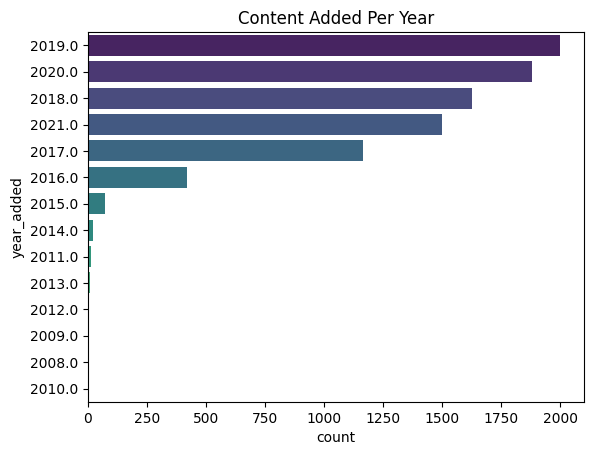

In [45]:
sns.countplot(data=df,y="year_added",order=df['year_added'].value_counts().index,palette="viridis")
plt.title("Content Added Per Year")
plt.show()

#top genres

In [47]:
from collections import Counter

genres=df['listed_in'].dropna().apply(lambda x: x.split(','))
all_genres=[g for sublist in genres for g in sublist]
top_genres=Counter(all_genres).most_common(10)

/tmp/ipython-input-4244394663.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_df, x="Count", y="Genre", palette="cubehelix")


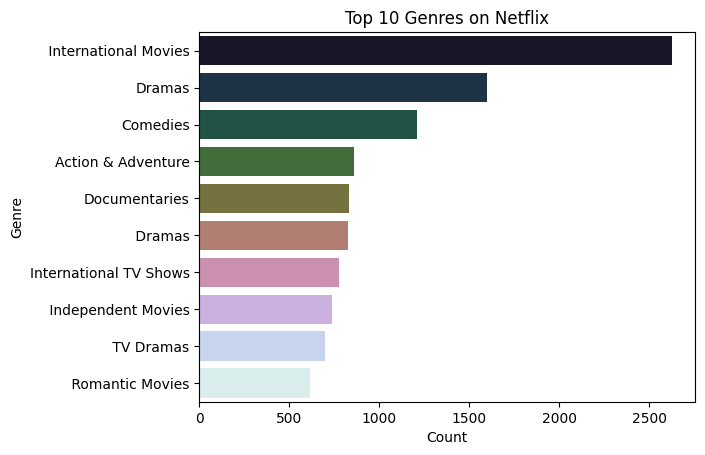

In [50]:
genre_df=pd.DataFrame(top_genres,columns=['Genre','Count'])
sns.barplot(data=genre_df, x="Count", y="Genre", palette="cubehelix")
plt.title("Top 10 Genres on Netflix")
plt.show()

Top 10 Directors

/tmp/ipython-input-3354315057.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette="mako")


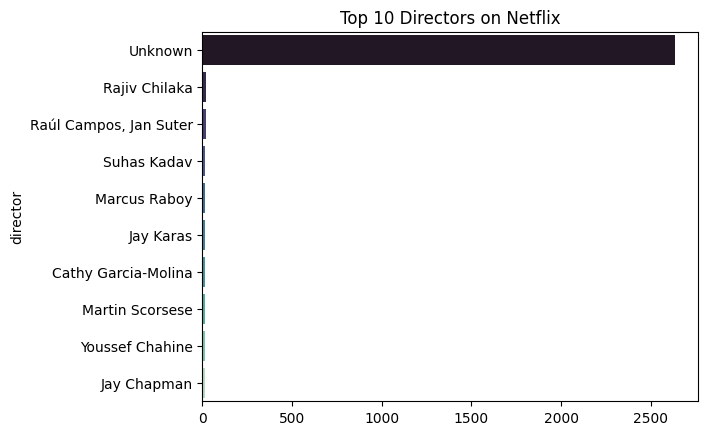

In [51]:
top_directors = df['director'].value_counts().head(10)
sns.barplot(x=top_directors.values, y=top_directors.index, palette="mako")
plt.title("Top 10 Directors on Netflix")
plt.show()

Word Cloud Discriptions

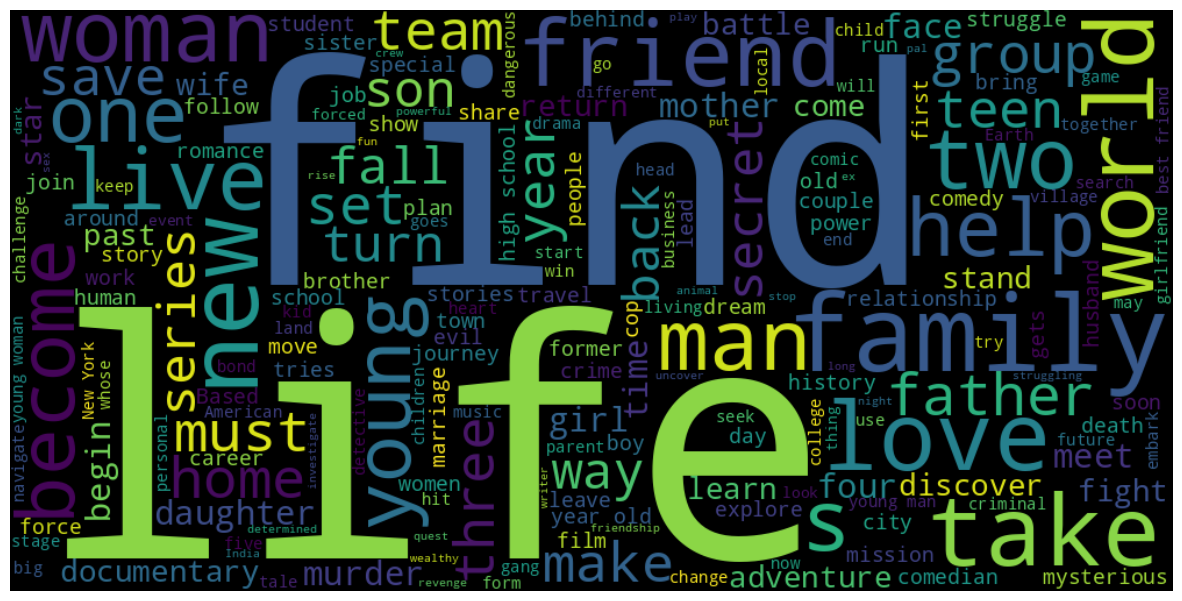

In [57]:
wordcloud = WordCloud(width=1000, height=500, background_color="black").generate(text)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()